# Rohit Jagtap (202201040048)
# Om Pawar (202201040010)
# Parth Kulkarni (202201040007)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **MINI Project**

## **Importing Libraries**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestRegressor
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load datasets
df = pd.read_csv('/content/drive/MyDrive/bitcoin_train_dataset.csv')

#### Deleting the duplicated rows

In [ ]:
df.drop_duplicates() # there is more 1000 duplicated row

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2165,2020-08-21,11878.026367,11899.259766,11564.979492,11592.489258,11592.489258,23762425999
2166,2020-08-22,11585.477539,11689.407227,11448.805664,11681.825195,11681.825195,20224191306
2167,2020-08-23,11679.696289,11713.429688,11559.920898,11664.847656,11664.847656,18482062658
2168,2020-08-24,11663.689453,11807.631836,11623.250000,11774.595703,11774.595703,20681511755


## **Displaying Basic info**

In [ ]:
# displaying first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Understanding data types and number of non-null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2170 non-null   object 
 1   Open       2170 non-null   float64
 2   High       2170 non-null   float64
 3   Low        2170 non-null   float64
 4   Close      2170 non-null   float64
 5   Adj Close  2170 non-null   float64
 6   Volume     2170 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.8+ KB


## **Handling Missing Values**


**1. Calculating number of missing values in each column**

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.isna().sum() / len(df) * 100 # Missing Values Percentage %

,0
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0


In [76]:
import pandas as pd

# Load the dataset (assuming df is already loaded)
# Replace 'df' with your actual DataFrame if not loaded yet.

# Drop duplicate rows
combined_df = df.drop_duplicates()

# Selecting relevant features for training
# Features: Open, High, Low, Volume; Target: Adj Close
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

# Splitting features and target
X = combined_df[features]
y = combined_df[target]

# Displaying the cleaned data summary
cleaned_data_summary = (combined_df.info(), combined_df.describe())

# Output cleaned data summary
print("Dataset Information:")
combined_df.info()
print("\nDataset Description:")
print(combined_df.describe())

# Confirm the shape of the prepared datasets
print("\nFeatures Shape:", X.shape)
print("Target Shape:", y.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                2170 non-null   object  
 1   Open                2170 non-null   float64 
 2   High                2170 non-null   float64 
 3   Low                 2170 non-null   float64 
 4   Close               2170 non-null   float64 
 5   Adj Close           2170 non-null   float64 
 6   Volume              2170 non-null   int64   
 7   Adj Close Category  2170 non-null   category
 8   Price Category      2170 non-null   category
dtypes: category(2), float64(5), int64(1), object(1)
memory usage: 123.3+ KB
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                2170 non-null  

**2. Checking the Frequency Distribution of Columns with Null Values**

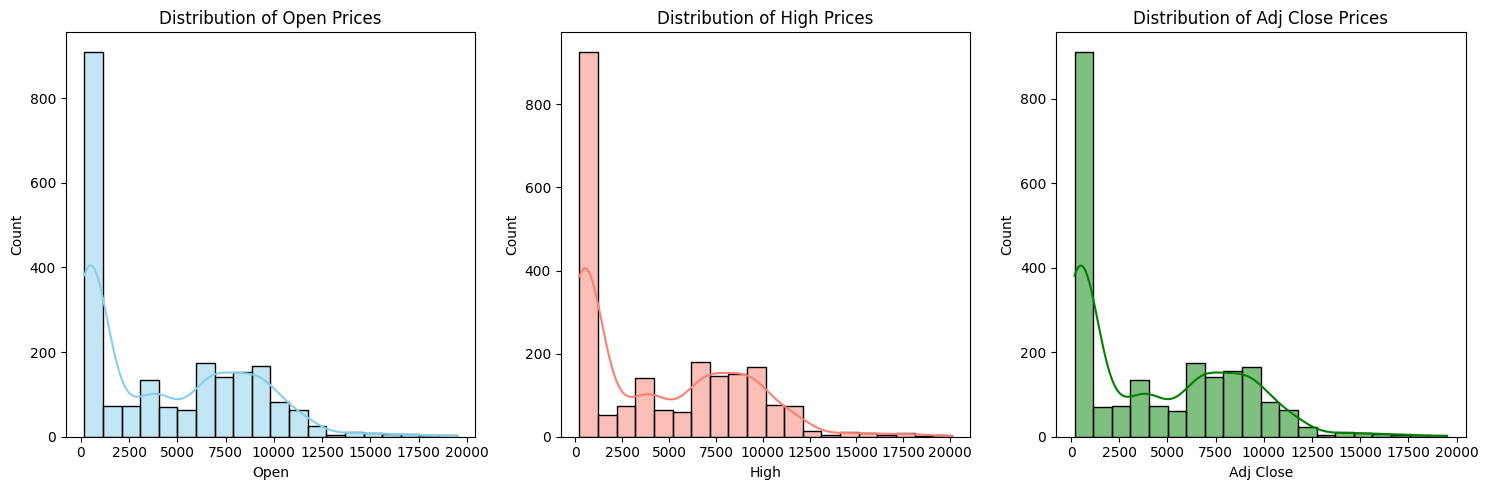

In [49]:
# Columns to plot
columns = ['Open', 'High', 'Adj Close']  # Replacing 'Close' with 'Adj Close'
colors = ['skyblue', 'salmon', 'green']
titles = ['Distribution of Open Prices', 'Distribution of High Prices', 'Distribution of Adj Close Prices']

# Set up the plot size
plt.figure(figsize=(15, 5))

# Plot histograms for the columns
for i, col in enumerate(columns):
    plt.subplot(1, 3, i + 1)  # Create subplots in a 1x3 grid
    sns.histplot(df[col], kde=True, bins=20, color=colors[i])  # Plot histogram with KDE
    plt.title(titles[i])  # Add a title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**3. Checking the boxplots of each columns and their central values**

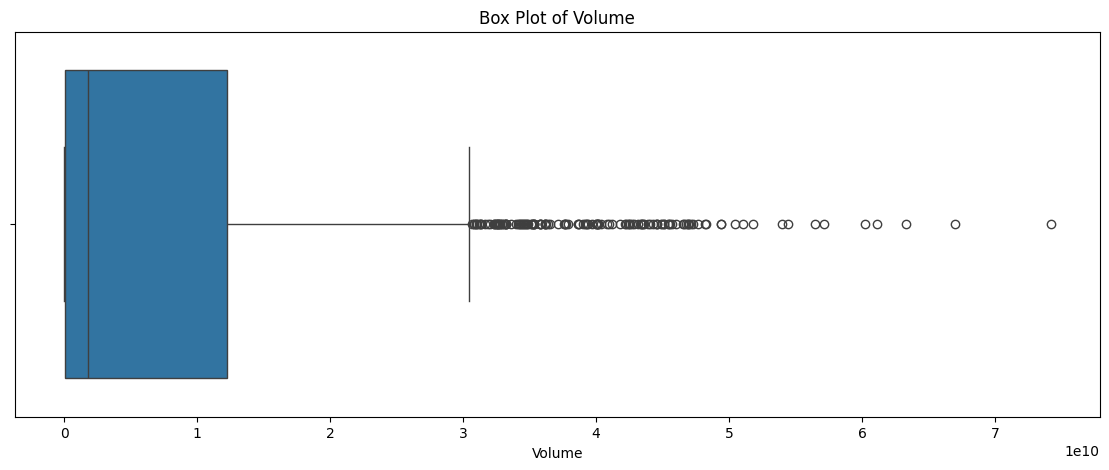

Median: 1819985024.0 
 Mean: 7725882847.999079 



In [50]:
# Volume box plot
plt.figure(figsize=(14, 5))
sns.boxplot(x=df['Volume'])
plt.title('Box Plot of Volume')
plt.show()

# Printing central values
print("Median:", df['Volume'].median(), "\n",
      "Mean:", df['Volume'].mean(), "\n")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


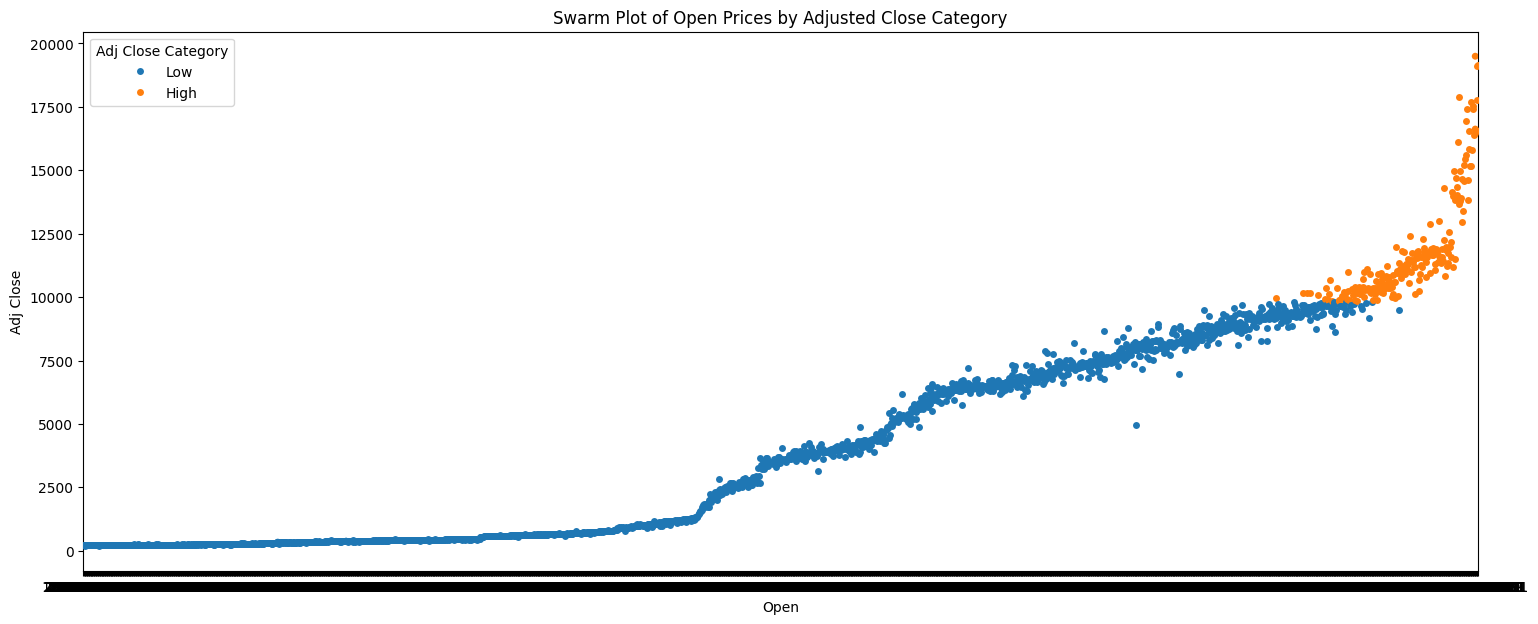

Median: 3579.682251 
 Mean: 4327.5979433299535 



In [51]:
# Create a categorical column for demonstration
df['Adj Close Category'] = pd.cut(df['Adj Close'], bins=2, labels=["Low", "High"])
# Explanation:
# - `pd.cut` divides the `Adj Close` values into two bins.
# - Labels "Low" and "High" are assigned to each bin to create a categorical column.

# Swarm plot
plt.figure(figsize=(18, 7))
sns.swarmplot(data=df, x='Open', y='Adj Close', hue='Adj Close Category')
plt.title('Swarm Plot of Open Prices by Adjusted Close Category')
plt.show()
# Explanation:
# - The swarm plot visualizes the distribution of `Open` prices, categorized by `Adj Close`.
# - `hue='Adj Close Category'` colors the points based on the "Low" or "High" category.

# Printing central values
print("Median:", df['Open'].median(), "\n",
      "Mean:", df['Open'].mean(), "\n")
# Explanation:
# - The median and mean of the `Open` column are calculated and displayed for statistical insights.


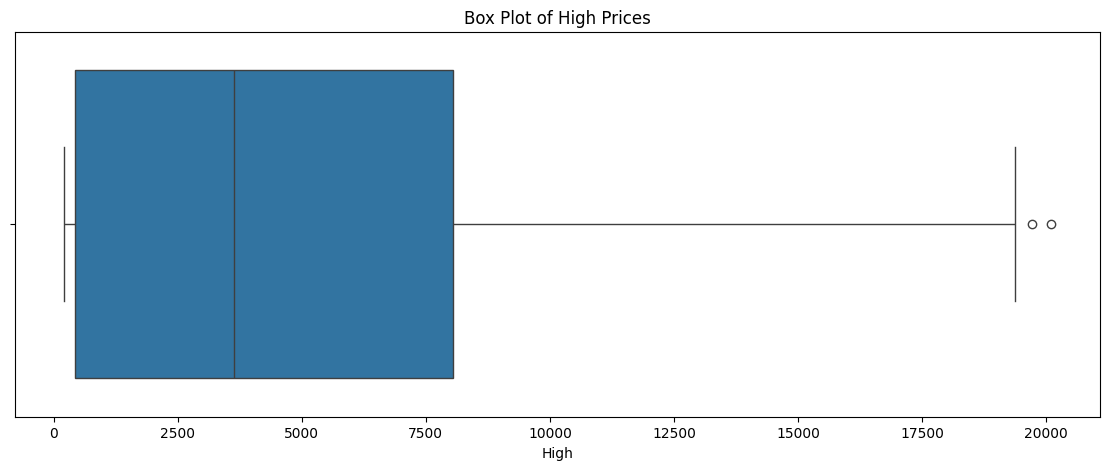

Median: 3634.6622315000004 
 Mean: 4438.156039063134 



In [52]:
# Box plot for 'High'
plt.figure(figsize=(14, 5))
sns.boxplot(x=df['High'])
plt.title('Box Plot of High Prices')
plt.show()

# Printing central values
print("Median:", df['High'].median(), "\n",
      "Mean:", df['High'].mean(), "\n")


**4. Filling Missing values**

In [53]:
# Fill missing values in the numeric columns
df['Open'] = df['Open'].fillna(df['Open'].mean())
df['High'] = df['High'].fillna(df['High'].median())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())


**5. Confirming All missing values are cleaned**

In [54]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Adj Close Category,0
Price Category,0


## **Understanding Price Values**
- To check if there is correlation between colums

<ipython-input-55-855e344ccf1c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Price Category'], palette='pastel')


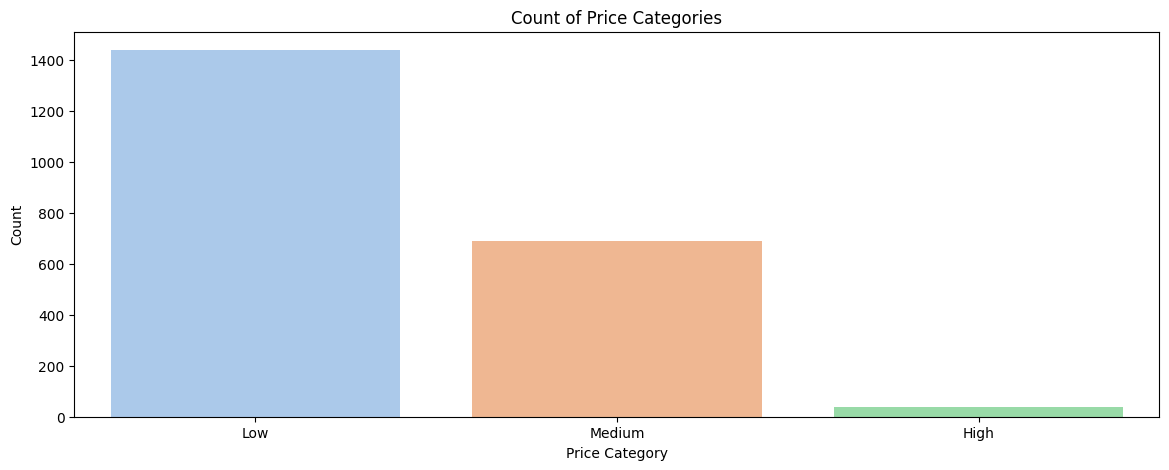

In [55]:
# Create a categorical column for demonstration
df['Price Category'] = pd.cut(df['Adj Close'], bins=3, labels=['Low', 'Medium', 'High'])
# Explanation:
# - `pd.cut` divides the `Adj Close` values into three bins.
# - Labels "Low", "Medium", and "High" are assigned to each bin to create a categorical column.

# Counting the categories
plt.figure(figsize=(14, 5))
sns.countplot(x=df['Price Category'], palette='pastel')
plt.title('Count of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()
# Explanation:
# - `sns.countplot` visualizes the number of entries in each price category ("Low", "Medium", "High").
# - `palette='pastel'` gives the bars a visually appealing color scheme.


<ipython-input-56-de30a6c0924b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Adj Close Category', y='Open', palette="Set3")


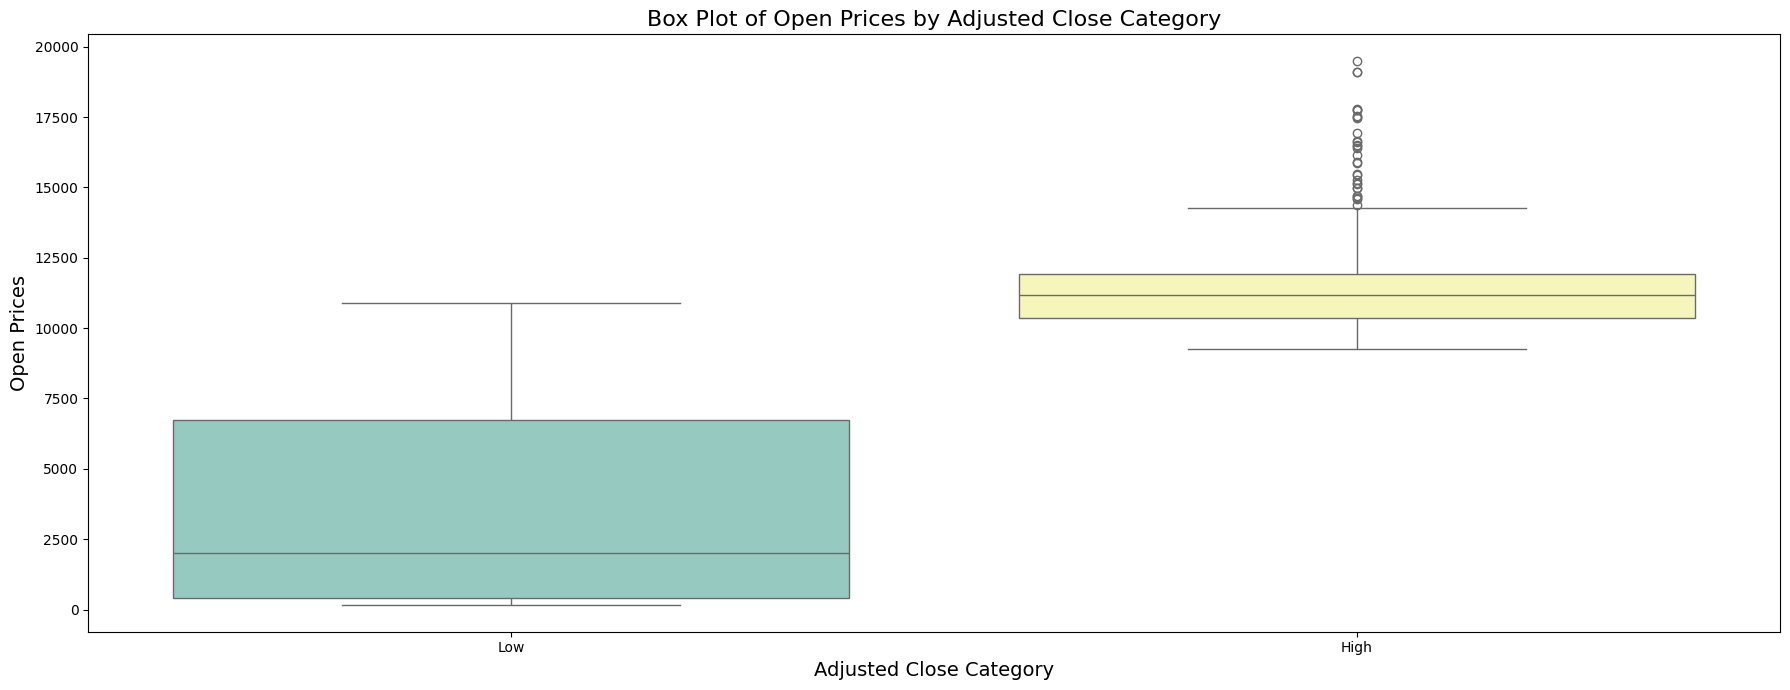

In [56]:
# Create a categorical column for demonstration
df['Adj Close Category'] = pd.cut(df['Adj Close'], bins=2, labels=["Low", "High"])
# Explanation:
# - `pd.cut` divides the `Adj Close` values into two bins.
# - Labels "Low" and "High" are assigned to the bins to create a categorical column.

# Box plot for Open Prices by Adjusted Close Category
plt.figure(figsize=(18, 7))
sns.boxplot(data=df, x='Adj Close Category', y='Open', palette="Set3")
# Explanation:
# - `x='Adj Close Category'`: Groups the data by the created categorical column.
# - `y='Open'`: Displays the distribution of `Open` prices within each category.
# - `palette="Set3"`: Adds an appealing color scheme to the plot.

plt.title('Box Plot of Open Prices by Adjusted Close Category', fontsize=16)
plt.xlabel('Adjusted Close Category', fontsize=14)
plt.ylabel('Open Prices', fontsize=14)
plt.tight_layout()
plt.show()


<ipython-input-57-a16df5705785>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price Category', y='Volume', palette="coolwarm")


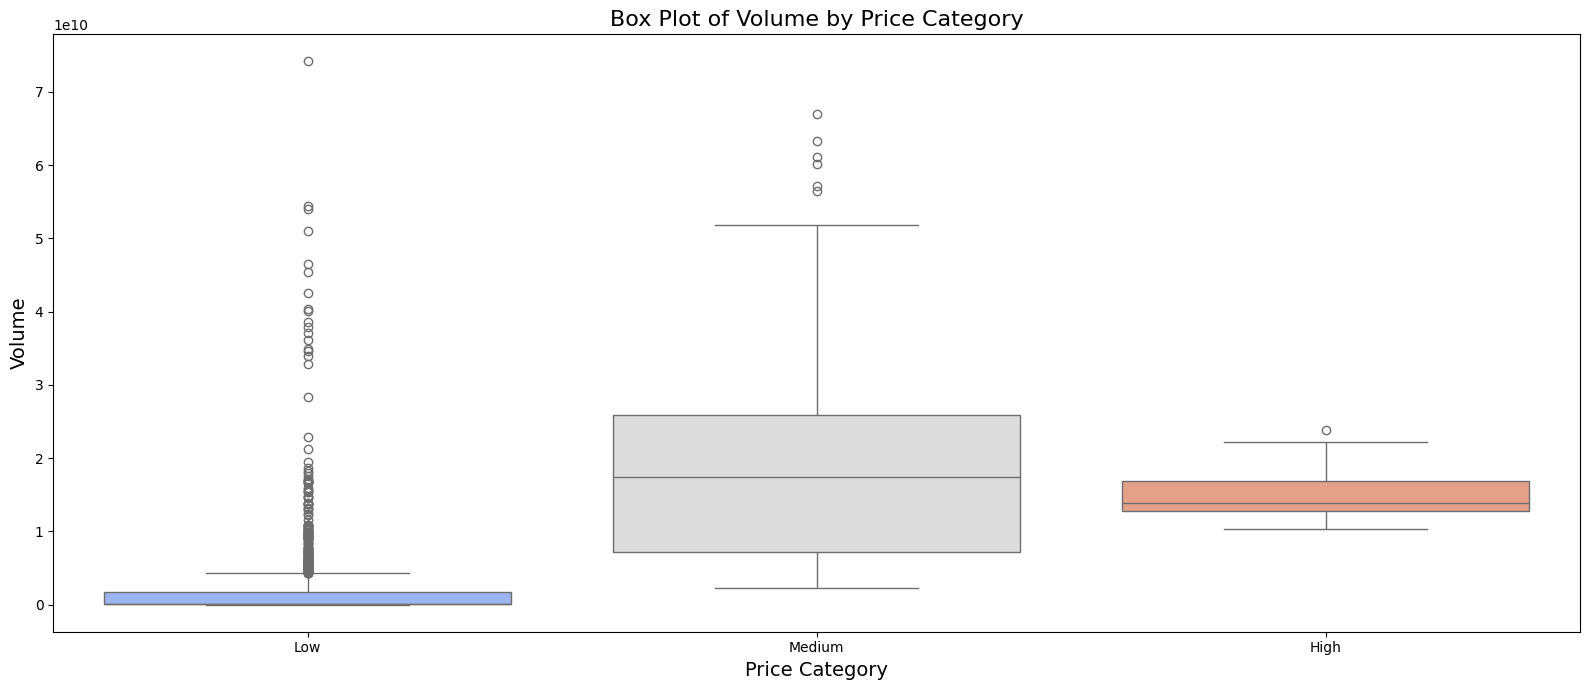

In [57]:
# Create a categorical column for demonstration
df['Price Category'] = pd.cut(df['Adj Close'], bins=3, labels=["Low", "Medium", "High"])
# Explanation:
# - `pd.cut` divides `Adj Close` values into three bins for categorization.
# - Labels "Low", "Medium", and "High" represent the bins.

# Box plot for Volume by Price Category
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='Price Category', y='Volume', palette="coolwarm")
# Explanation:
# - `x='Price Category'`: Groups the data by the created price categories.
# - `y='Volume'`: Displays the distribution of `Volume` within each category.
# - `palette="coolwarm"`: Adds a visually appealing gradient color scheme.

# Add titles and labels
plt.title('Box Plot of Volume by Price Category', fontsize=16)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


<ipython-input-58-bb6f3bf094a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price Category', y='High', palette="coolwarm")


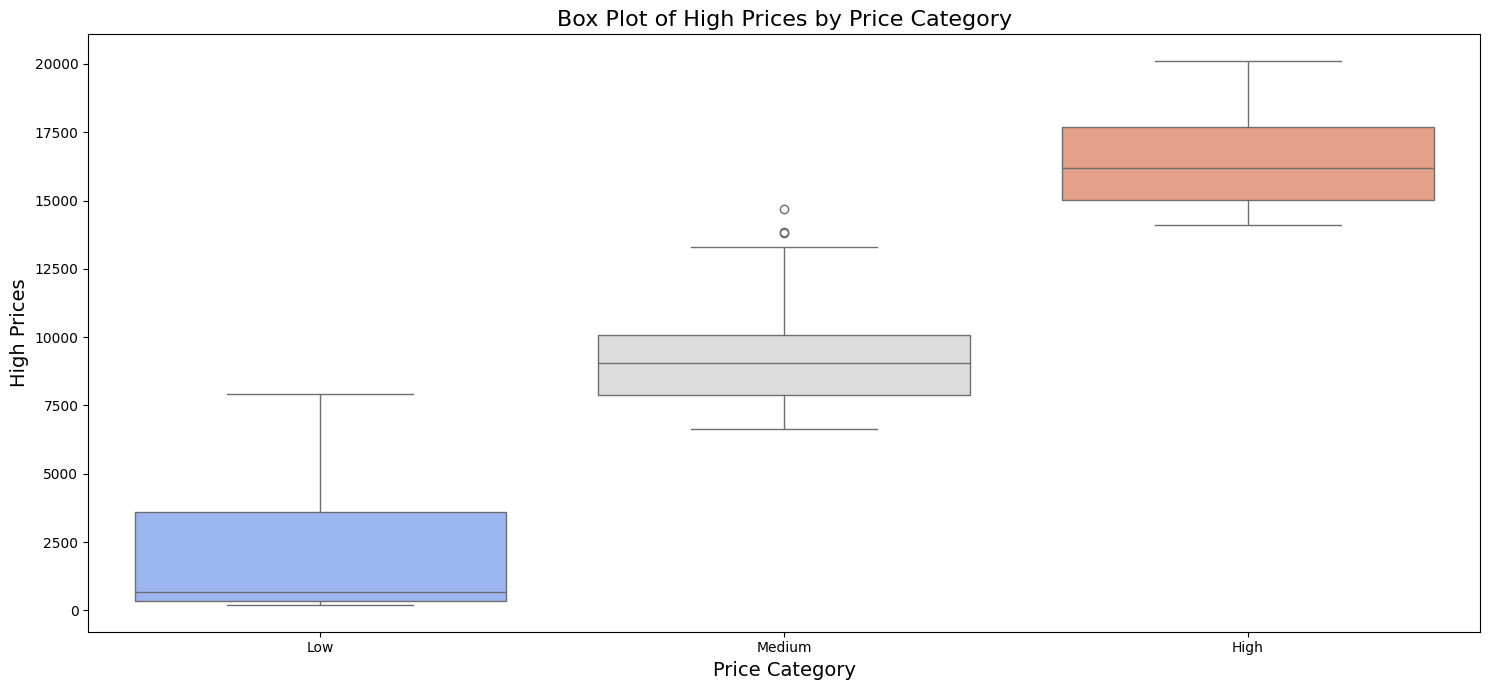

In [58]:
# Create a categorical column for demonstration
df['Price Category'] = pd.cut(df['Adj Close'], bins=3, labels=["Low", "Medium", "High"])
# Explanation:
# - `pd.cut` splits the `Adj Close` values into three equal-width bins.
# - Labels "Low", "Medium", and "High" represent the categories.

# Box plot for High Prices by Price Category
plt.figure(figsize=(15, 7))  # Set the figure size
sns.boxplot(data=df, x='Price Category', y='High', palette="coolwarm")
# Explanation:
# - `x='Price Category'`: Groups data by the created price categories.
# - `y='High'`: Displays the distribution of `High` prices within each category.
# - `palette="coolwarm"`: Applies a gradient color scheme for aesthetics.

# Add titles and labels
plt.title('Box Plot of High Prices by Price Category', fontsize=16)  # Add a title
plt.xlabel('Price Category', fontsize=14)  # Label for x-axis
plt.ylabel('High Prices', fontsize=14)  # Label for y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [59]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Explanation:
# - `select_dtypes(include=['float64', 'int64'])` filters only numeric columns for correlation computation.

# Compute the correlation matrix for numeric columns
df_corr = numeric_df.corr() * 100
# Explanation:
# - `.corr()`: Computes pairwise correlation between all numeric columns.
# - `* 100`: Scales correlation values to percentage form for better readability.

# Print correlations with 'Adj Close'
adj_close_corr = df_corr['Adj Close'].sort_values(ascending=False)
# Explanation:
# - `df_corr['Adj Close']`: Extracts correlations of all columns with `Adj Close`.
# - `sort_values(ascending=False)`: Sorts the correlations in descending order to highlight the strongest correlations.

# Display the sorted correlations
print(adj_close_corr)


Close        100.000000
Adj Close    100.000000
High          99.894337
Low           99.870312
Open          99.758981
Volume        69.053767
Name: Adj Close, dtype: float64


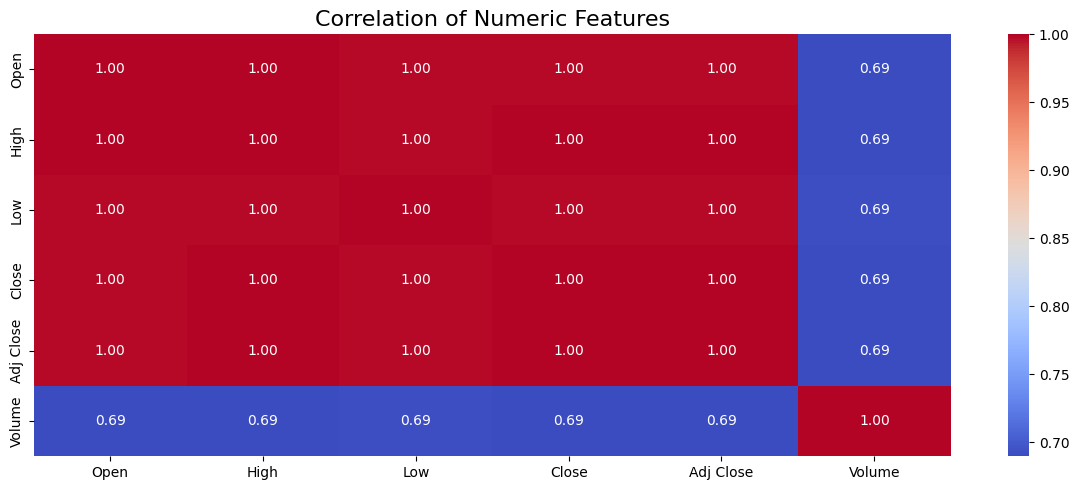

In [60]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Explanation:
# - Selects only numeric columns (`float64` and `int64`) for correlation analysis.

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
# Explanation:
# - `.corr()` calculates pairwise Pearson correlation coefficients for all numeric columns.

# Plot the correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
# Explanation:
# - `cmap='coolwarm'`: Specifies the color palette to represent correlation values.
# - `annot=True`: Annotates each cell with its correlation value.
# - `fmt='.2f'`: Formats correlation values to two decimal places.
# - `cbar=True`: Displays a color bar indicating the correlation scale.

# Add title to the heatmap
plt.title("Correlation of Numeric Features", fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## **Data Visualizations**

**1.Frequency Distribution of each feature**

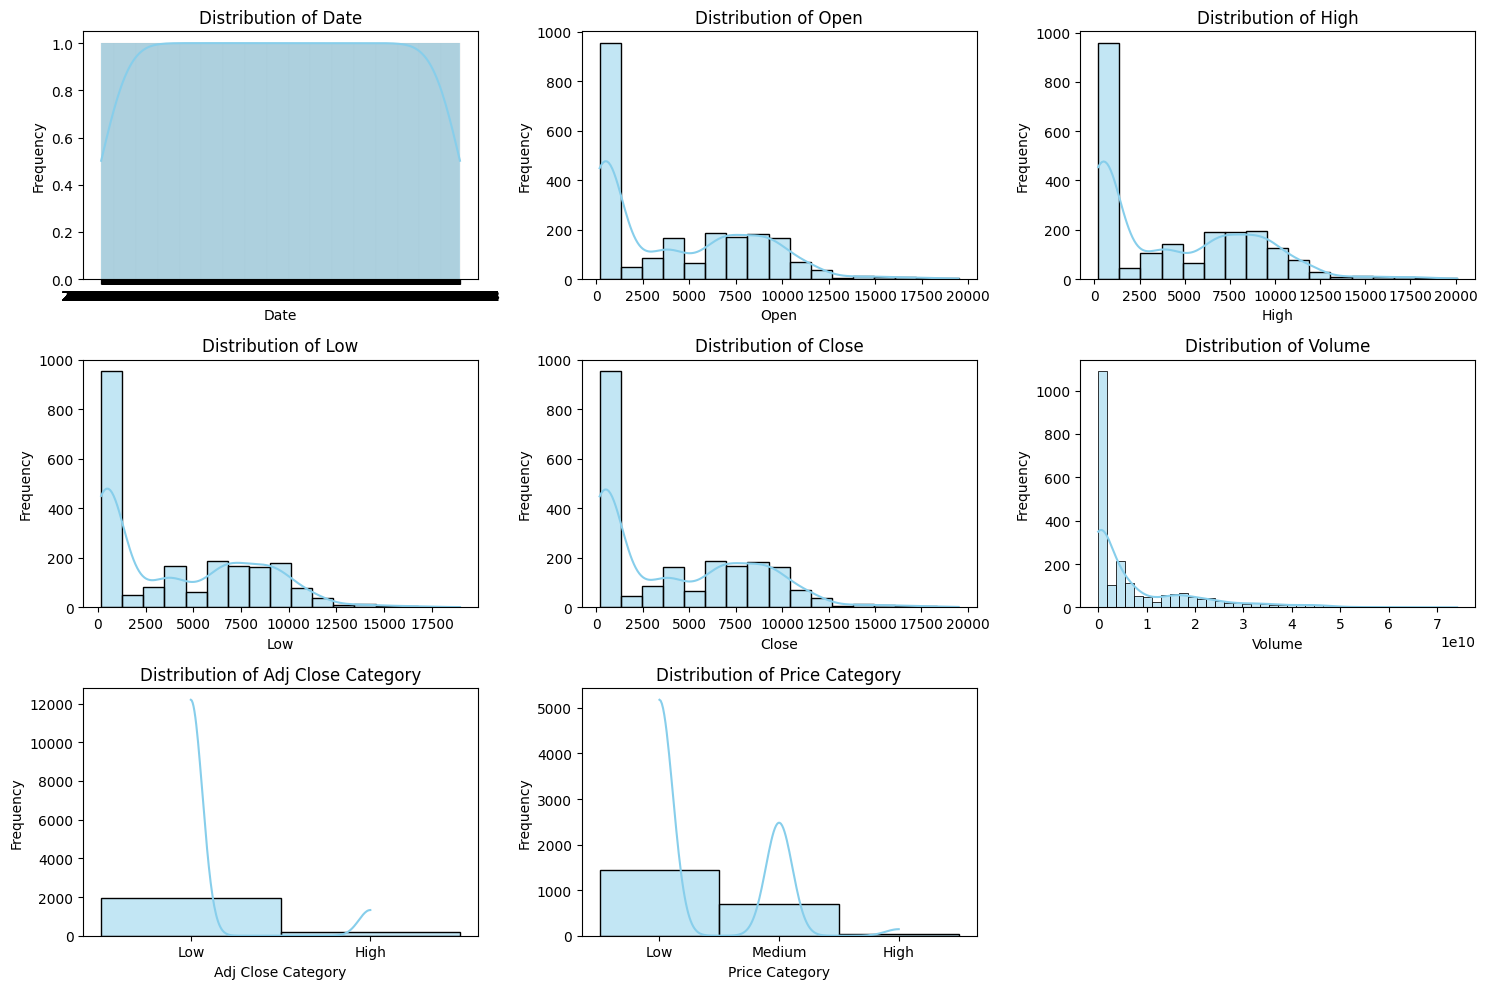

In [61]:
plt.figure(figsize=(15, 10))
features = df.columns.drop('Adj Close') if 'Adj Close' in df.columns else df.columns
n_features = len(features)  # Total number of features to visualize
n_cols = 3                  # Fixed number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue')  # Handle missing data
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**2.Pairplot**

<Figure size 1000x800 with 0 Axes>

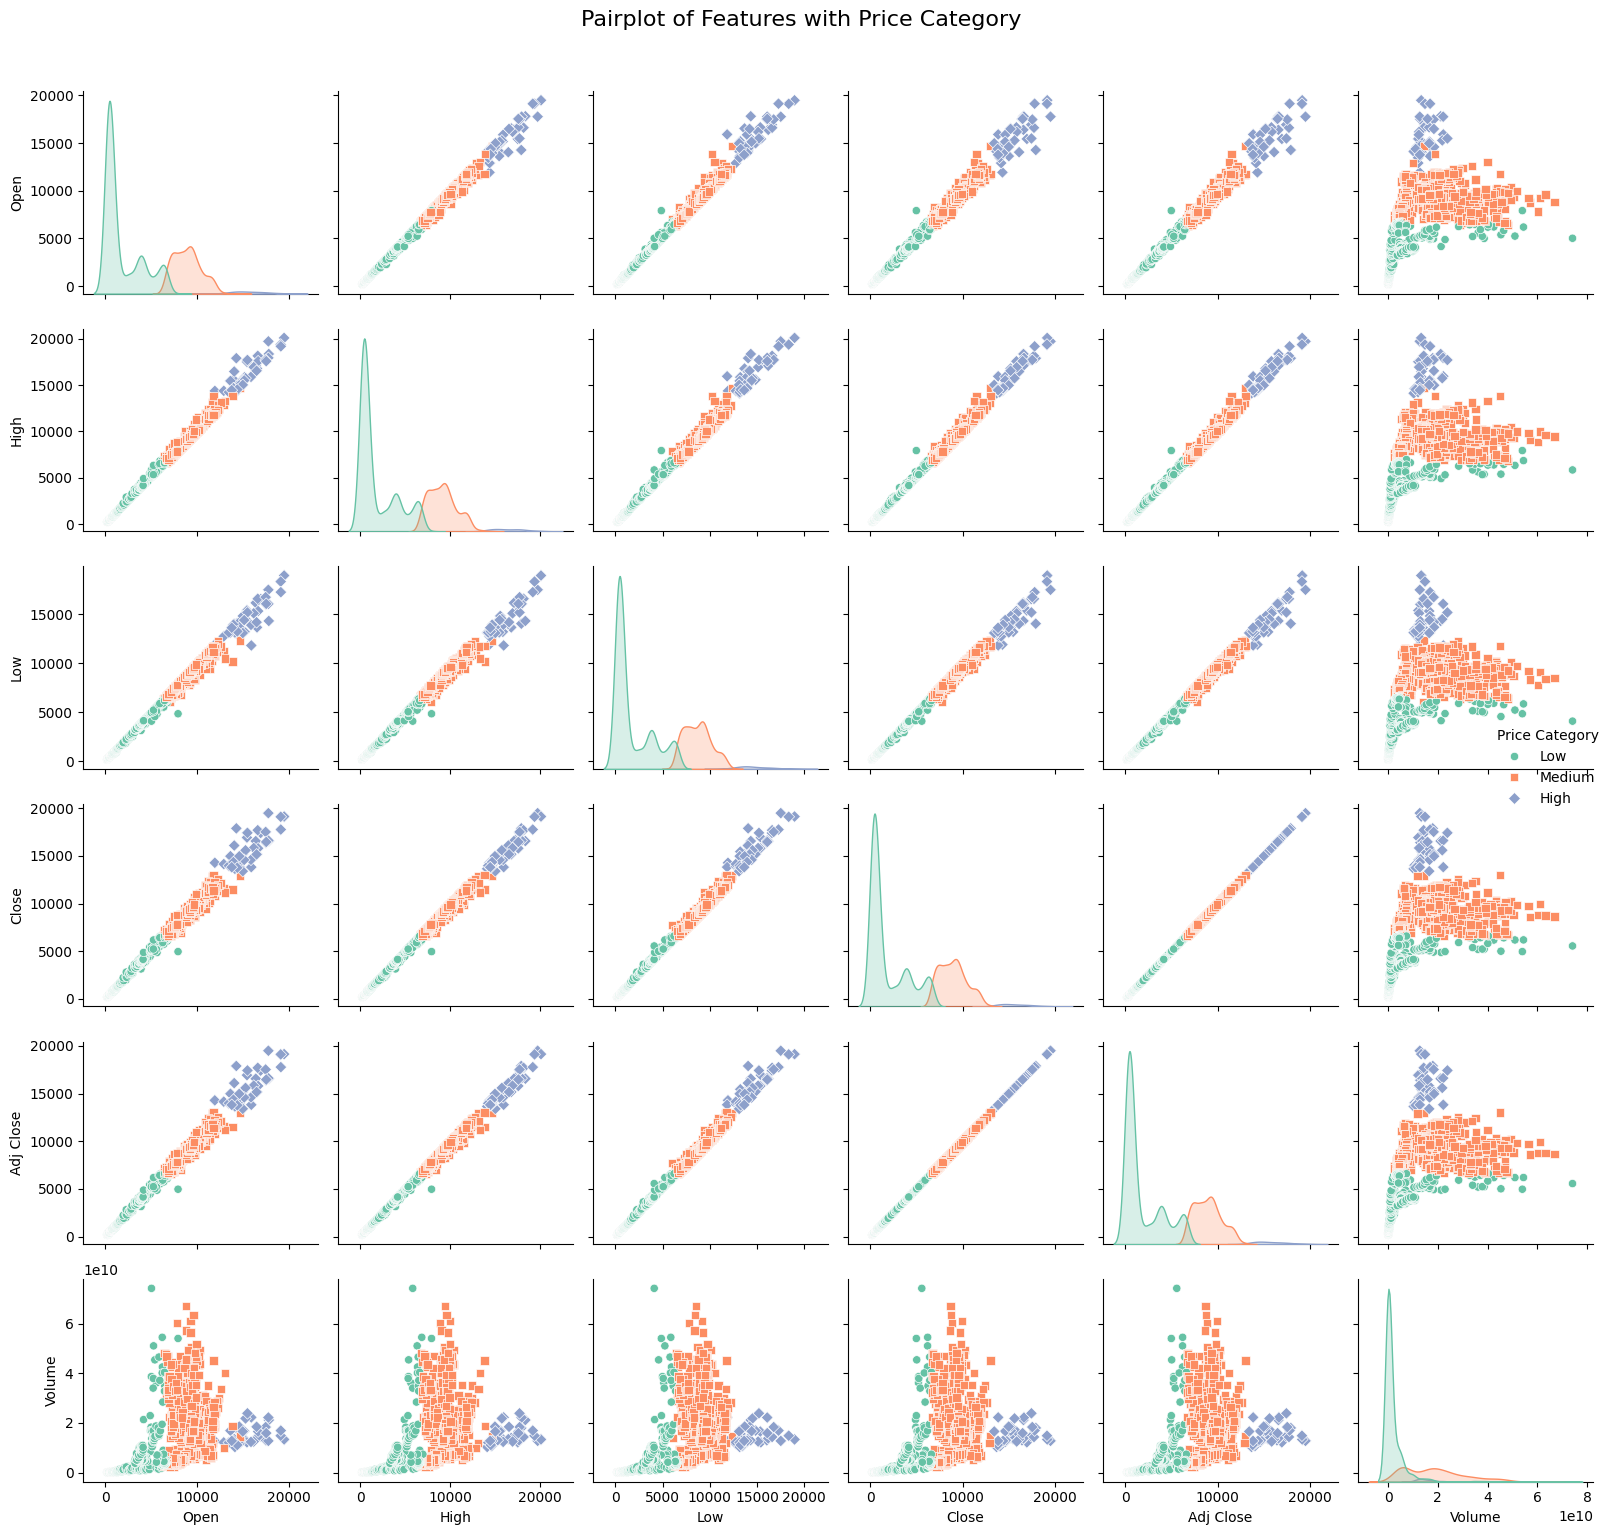

In [62]:
# Create a categorical column for demonstration
df['Price Category'] = pd.cut(df['Adj Close'], bins=3, labels=["Low", "Medium", "High"])
# Explanation:
# - `pd.cut` divides `Adj Close` values into three bins labeled as "Low", "Medium", and "High".

# Set up the plot size
plt.figure(figsize=(10, 8))

# Use seaborn pairplot to visualize relationships between features, using 'Price Category' as hue
pairplot = sns.pairplot(
    df,
    hue='Price Category',
    palette='Set2',
    markers=["o", "s", "D"],
    diag_kind='kde'
)
# Explanation:
# - `hue='Price Category'`: Colors the data points by their respective price category.
# - `palette='Set2'`: Applies a visually appealing color palette.
# - `markers=["o", "s", "D"]`: Assigns different markers for each category ("o" for Low, "s" for Medium, "D" for High).
# - `diag_kind='kde'`: Displays Kernel Density Estimate (KDE) plots on the diagonal instead of histograms.

# Set the title for the pairplot
pairplot.fig.suptitle('Pairplot of Features with Price Category', y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


**3.Feature Importance**

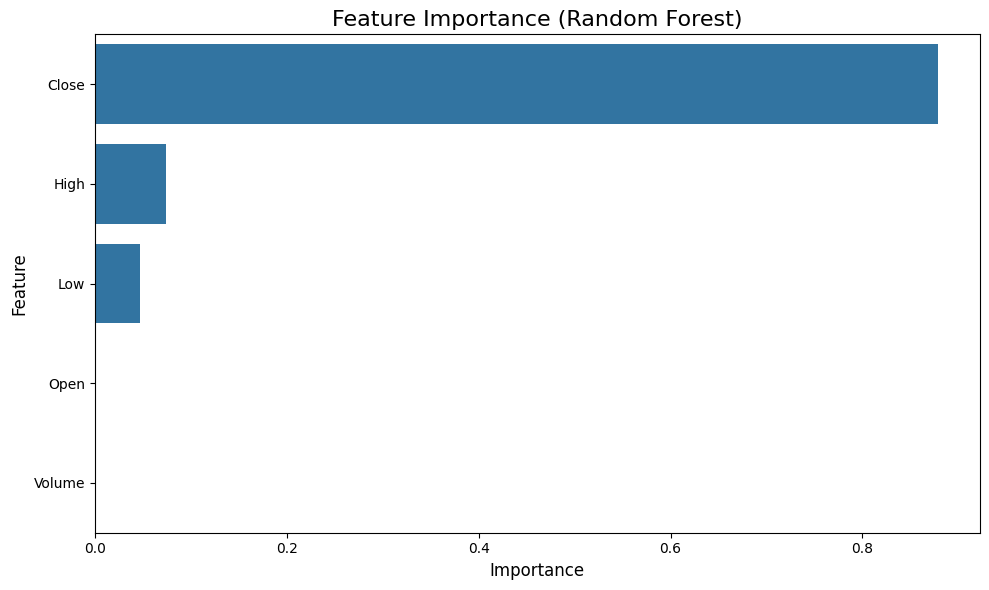

  Feature  Importance
3   Close    0.878587
1    High    0.074175
2     Low    0.046850
0    Open    0.000364
4  Volume    0.000024


In [63]:
# Drop non-numeric columns (e.g., 'Date') and keep numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Assuming 'Adj Close' is the target variable for regression
X = df_numeric.drop('Adj Close', axis=1)  # Features
y = df_numeric['Adj Close']  # Target variable

# Initialize the Random Forest model for regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X, y)

# Get the feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the feature importances as a bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Set the title and labels
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the feature importance scores
print(feature_importance_df)


In [64]:

# Select only numeric columns (e.g., 'Adj Close' and features)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a binary target column based on 'Adj Close'
df_numeric['Price Category'] = pd.cut(df_numeric['Adj Close'], bins=2, labels=[0, 1])
# Explanation:
# - `pd.cut` divides 'Adj Close' values into two bins.
# - Labels `0` (Low) and `1` (High) are assigned to the bins.

# Split the data into features (X) and target (y)
X = df_numeric.drop(['Adj Close', 'Price Category'], axis=1)  # Features
y = df_numeric['Price Category']  # Target variable (binary classification)

# Apply BorderlineSMOTE for balancing the classes
smote = BorderlineSMOTE(random_state=42, kind='borderline-2')
X_smote, y_smote = smote.fit_resample(X, y)
# Explanation:
# - `BorderlineSMOTE`: Balances the dataset by generating synthetic samples for the minority class.
# - `kind='borderline-2'`: Focuses on borderline samples of the minority class to improve class balance.

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
# Explanation:
# - `train_test_split`: Divides the resampled dataset into 80% training and 20% testing.

# Check the shape and distribution of the data
print("Original target distribution:")
print(y.value_counts())  # Counts of the original target classes

print("\nResampled target distribution:")
print(y_smote.value_counts())  # Counts of the resampled target classes


Original target distribution:
Price Category
0    1957
1     213
Name: count, dtype: int64

Resampled target distribution:
Price Category
0    1957
1    1957
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


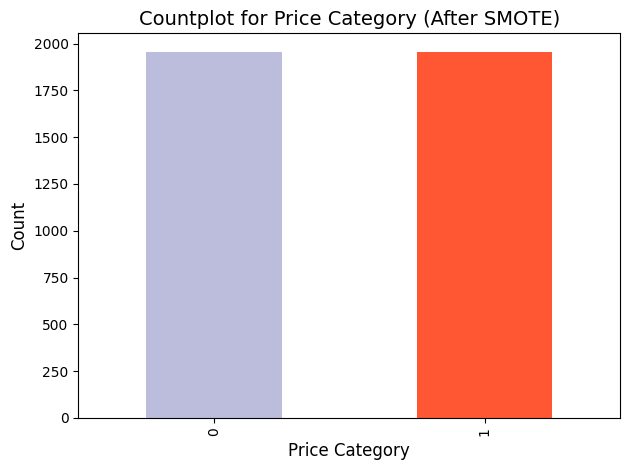

In [65]:
import matplotlib.pyplot as plt

# Plot the class distribution after applying SMOTE
y_smote.value_counts().plot(kind='bar', color=["#bcbddc", "#FF5733"])
# Explanation:
# - `y_smote.value_counts()`: Counts the instances of each class in the resampled target variable.
# - `plot(kind='bar')`: Creates a bar plot to visualize the class distribution.
# - `color`: Sets custom colors for the bars.

# Title and labels
plt.title("Countplot for Price Category (After SMOTE)", fontsize=14)
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### **Model 1.1: Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the RandomForestClassifier with the best hyperparameters
rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
rf_accuracy = round(accuracy_score(y_test, y_pred), 3)
rf_precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
rf_recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
rf_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Print classification results
print("Random Forest Classification Results with Best Hyperparameters:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")

# Storing results in a dict
rf_results = {
    'Model': 'Random Forest with Best Hyperparameters',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'Best Hyperparameters': {
        'bootstrap': True,
        'max_depth': None,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 200
    }
}

Random Forest Classification Results with Best Hyperparameters:
Accuracy: 0.969
Precision: 0.969
Recall: 0.969
F1-Score: 0.969


### **Model 1.2: Gaussian Naive Bayes**

In [67]:
# Initialize the Gaussian Naive Bayes model with the best hyperparameters found from RandomizedSearchCV
gnb = GaussianNB(var_smoothing=2.310129700083158e-06)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Calculate metrics with zero_division handling
gnb_accuracy = round(accuracy_score(y_test, y_pred_gnb), 3)
gnb_precision = round(precision_score(y_test, y_pred_gnb, average='weighted', zero_division=1), 3)
gnb_recall = round(recall_score(y_test, y_pred_gnb, average='weighted'), 3)
gnb_f1 = round(f1_score(y_test, y_pred_gnb, average='weighted'), 3)

# Print classification results
print("Gaussian Naive Bayes Classification Results with Best Hyperparameters:")
print(f"Accuracy: {gnb_accuracy}")
print(f"Precision: {gnb_precision}")
print(f"Recall: {gnb_recall}")
print(f"F1-Score: {gnb_f1}")

# Store results in a dictionary for later comparison
gnb_results = {
    'Model': 'Gaussian Naive Bayes with Best Hyperparameters',
    'Accuracy': gnb_accuracy,
    'Precision': gnb_precision,
    'Recall': gnb_recall,
    'F1-Score': gnb_f1,
    'Best Hyperparameters': {'var_smoothing': 2.310129700083158e-06}
}


Gaussian Naive Bayes Classification Results with Best Hyperparameters:
Accuracy: 0.834
Precision: 0.834
Recall: 0.834
F1-Score: 0.834


### **Model 1.3: XGBoosting Classifier**

In [68]:
# Define the XGBoost model with the best hyperparameters
xgb_model = xgb.XGBClassifier(subsample=0.8,reg_lambda=0.2,reg_alpha=0.1,n_estimators=300,max_depth=7,learning_rate=0.1,gamma=0.4,colsample_bytree=1.0
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions with the model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 3)
xgb_precision = round(precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1), 3)
xgb_recall = round(recall_score(y_test, y_pred_xgb, average='weighted'), 3)
xgb_f1 = round(f1_score(y_test, y_pred_xgb, average='weighted'), 3)

# Print classification results
print("XGBoost Classification Results with Best Hyperparameters:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-Score: {xgb_f1}")

# Store results in a dictionary for later comparison
xgb_results = {
    'Model': 'XGBoost with Best Hyperparameters',
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1
}



XGBoost Classification Results with Best Hyperparameters:
Accuracy: 0.971
Precision: 0.971
Recall: 0.971
F1-Score: 0.971


### **Model 1.4: Adaboost Classifier**

In [69]:
# Initialize the AdaBoost classifier with the best hyperparameters
ada_boost = AdaBoostClassifier(learning_rate=1.0, n_estimators=150,algorithm='SAMME')

# Train the model
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_boost.predict(X_test)

# Calculate metrics
ada_accuracy = round(accuracy_score(y_test, y_pred_ada), 3)
ada_precision = round(precision_score(y_test, y_pred_ada, average='weighted', zero_division=1), 3)
ada_recall = round(recall_score(y_test, y_pred_ada, average='weighted'), 3)
ada_f1 = round(f1_score(y_test, y_pred_ada, average='weighted'), 3)

# Print classification results
print("AdaBoost Classification Results:")
print(f"Accuracy: {ada_accuracy}")
print(f"Precision: {ada_precision}")
print(f"Recall: {ada_recall}")
print(f"F1-Score: {ada_f1}")

# Store results in a dictionary for later comparison
ada_results = {
    'Model': 'AdaBoost',
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1
}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Classification Results:
Accuracy: 0.972
Precision: 0.972
Recall: 0.972
F1-Score: 0.972


# **TRAINING 2 (Scale Sensitive Models)**

### **Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model 2.1: Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Logistic Regression model with the best hyperparameters
lr = LogisticRegression(C=0.1, max_iter=500, penalty='l2', solver='lbfgs')  # Using the best hyperparameters
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = round(accuracy_score(y_test, y_pred_lr), 3)
lr_precision = round(precision_score(y_test, y_pred_lr, average='weighted', zero_division=1), 3)
lr_recall = round(recall_score(y_test, y_pred_lr, average='weighted'), 3)
lr_f1 = round(f1_score(y_test, y_pred_lr, average='weighted'), 3)

# Print classification results
print("Logistic Regression Classification Results with Best Hyperparameters:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-Score: {lr_f1}")

# Store results in a dictionary for later comparison
lr_results = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1
}


Logistic Regression Classification Results with Best Hyperparameters:
Accuracy: 0.958
Precision: 0.96
Recall: 0.958
F1-Score: 0.958


### **Model 2.2: SVM**

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the SVM model with the best hyperparameters
svm = SVC(C=0.1, kernel='rbf', gamma='scale', degree=3, coef0=0.0)  # Use the hyperparameters you obtained

# Fit the model to the scaled training data
svm.fit(X_train_scaled, y_train)

# Make predictions using the trained model
y_pred_svm = svm.predict(X_test_scaled)

# Calculate the classification metrics
svm_accuracy = round(accuracy_score(y_test, y_pred_svm), 3)
svm_precision = round(precision_score(y_test, y_pred_svm, average='weighted', zero_division=1), 3)
svm_recall = round(recall_score(y_test, y_pred_svm, average='weighted'), 3)
svm_f1 = round(f1_score(y_test, y_pred_svm, average='weighted'), 3)

# Print the results
print("SVM Classification Results with Predefined Hyperparameters:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-Score: {svm_f1}")

# Store results in a dictionary for later comparison
svm_results = {
    'Model': 'SVM with Predefined Hyperparameters',
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1-Score': svm_f1
}


SVM Classification Results with Predefined Hyperparameters:
Accuracy: 0.957
Precision: 0.959
Recall: 0.957
F1-Score: 0.957


### **Model 2.3: KNN**

In [72]:
# Train the KNN classifier and make predictions
knn = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors; can be tuned
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate metrics with zero_division handling
knn_accuracy = round(accuracy_score(y_test, y_pred_knn), 3)
knn_precision = round(precision_score(y_test, y_pred_knn, average='weighted', zero_division=1), 3)
knn_recall = round(recall_score(y_test, y_pred_knn, average='weighted'), 3)
knn_f1 = round(f1_score(y_test, y_pred_knn, average='weighted'), 3)

# Print classification results
print("KNN Classification Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-Score: {knn_f1}")

# Store results in a dictionary for later comparison
knn_results = {
    'Model': 'KNN',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1-Score': knn_f1
}


KNN Classification Results:
Accuracy: 0.934
Precision: 0.941
Recall: 0.934
F1-Score: 0.933


### **Model 7: Voting Classifier (LogReg + SVM + RandomForest)**

In [73]:
# Define base classifiers (you can include the classifiers you want to vote on)
rf = RandomForestClassifier()
lr = LogisticRegression()
svm = SVC()

# Create the Voting Classifier (Voting='hard' for majority voting, 'soft' for probability averaging)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('svm', svm)], voting='hard')

# Train the Voting Classifier and make predictions
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Calculate metrics with zero_division handling
voting_accuracy = round(accuracy_score(y_test, y_pred_voting), 3)
voting_precision = round(precision_score(y_test, y_pred_voting, average='weighted', zero_division=1), 3)
voting_recall = round(recall_score(y_test, y_pred_voting, average='weighted'), 3)
voting_f1 = round(f1_score(y_test, y_pred_voting, average='weighted'), 3)

# Print classification results
print("Voting Classifier Classification Results:")
print(f"Accuracy: {voting_accuracy}")
print(f"Precision: {voting_precision}")
print(f"Recall: {voting_recall}")
print(f"F1-Score: {voting_f1}")

# Store results in a dictionary for later comparison
voting_results = {
    'Model': 'Voting Classifier',
    'Accuracy': voting_accuracy,
    'Precision': voting_precision,
    'Recall': voting_recall,
    'F1-Score': voting_f1
}


Voting Classifier Classification Results:
Accuracy: 0.894
Precision: 0.912
Recall: 0.894
F1-Score: 0.893


### **Model 8: Stacking Classifier (LogReg + RandomForest + SVM)**

In [74]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define base models (classifiers) for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=2)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))
]

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

# Define the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Calculate metrics
stacking_accuracy = round(accuracy_score(y_test, y_pred), 3)
stacking_precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
stacking_recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
stacking_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Printing classification results
print("Stacking Classifier Results:")
print(f"Accuracy: {stacking_accuracy}")
print(f"Precision: {stacking_precision}")
print(f"Recall: {stacking_recall}")
print(f"F1-Score: {stacking_f1}")

# Storing results in a dict
stacking_results = {
    'Model': 'Stacking Classifier',
    'Accuracy': stacking_accuracy,
    'Precision': stacking_precision,
    'Recall': stacking_recall,
    'F1-Score': stacking_f1,
    'Base Learners': base_learners,
    'Meta Model': 'Logistic Regression'
}

# Optionally, print the base learners and meta model
print(f"Base Learners: {stacking_results['Base Learners']}")
print(f"Meta Model: {stacking_results['Meta Model']}")


Stacking Classifier Results:
Accuracy: 0.969
Precision: 0.969
Recall: 0.969
F1-Score: 0.969
Base Learners: [('rf', RandomForestClassifier(min_samples_leaf=2, n_estimators=200)), ('gb', GradientBoostingClassifier())]
Meta Model: Logistic Regression


# **Comparative analysis**

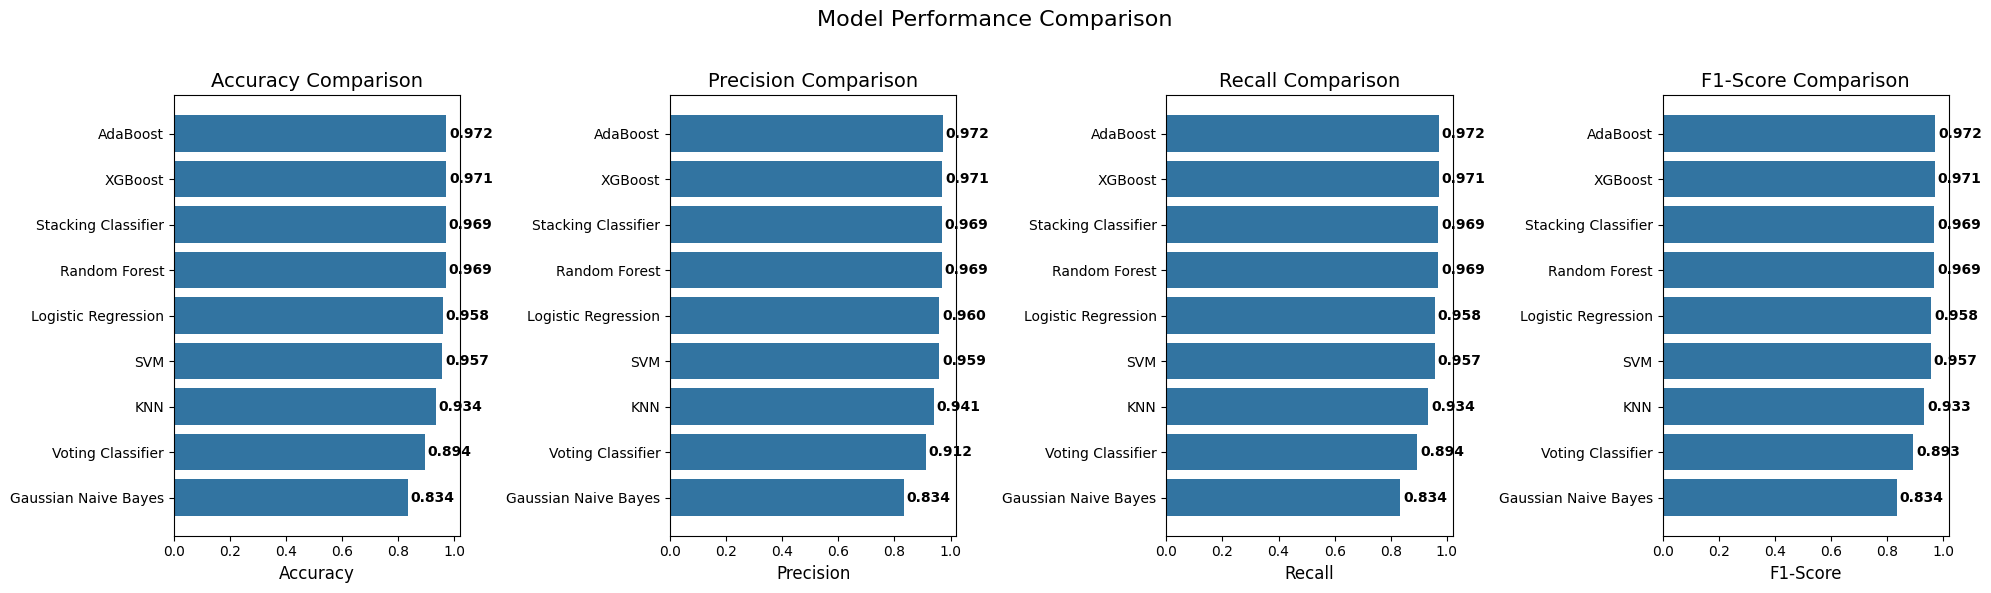

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Store all performance metrics in dictionaries for comparison
metrics = {
    'Logistic Regression': {'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall, 'F1-Score': lr_f1},
    'SVM': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'F1-Score': svm_f1},
    'KNN': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1-Score': knn_f1},
    'Random Forest': {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1-Score': rf_f1},
    'Gaussian Naive Bayes': {'Accuracy': gnb_accuracy, 'Precision': gnb_precision, 'Recall': gnb_recall, 'F1-Score': gnb_f1},
    'AdaBoost': {'Accuracy': ada_accuracy, 'Precision': ada_precision, 'Recall': ada_recall, 'F1-Score': ada_f1},
    'Voting Classifier': {'Accuracy': voting_accuracy, 'Precision': voting_precision, 'Recall': voting_recall, 'F1-Score': voting_f1},
    'Stacking Classifier': {'Accuracy': stacking_accuracy, 'Precision': stacking_precision, 'Recall': stacking_recall, 'F1-Score': stacking_f1},
    'XGBoost': {'Accuracy': xgb_accuracy, 'Precision': xgb_precision, 'Recall': xgb_recall, 'F1-Score': xgb_f1}
}

# Prepare the data for plotting
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(metrics.keys())

# Set up the plot for all metrics
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Plot each metric
for i, metric in enumerate(metric_names):
    # Extract the values for the current metric
    model_metric_values = [metrics[model][metric] for model in model_names]

    # Sort models by the current metric
    sorted_metrics = sorted(zip(model_metric_values, model_names))
    sorted_metric_values, sorted_model_names = zip(*sorted_metrics)

    # Create the bar plot
    axes[i].barh(sorted_model_names, sorted_metric_values, color='#3274a1')
    axes[i].set_xlabel(metric, fontsize=12)
    axes[i].set_title(f'{metric} Comparison', fontsize=14)

    # Add the metric values on the bars
    for j, v in enumerate(sorted_metric_values):
        axes[i].text(v + 0.01, j, f'{v:.3f}', ha='left', va='center', fontweight='bold')

# Add overall title and adjust layout
fig.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap with suptitle

# Show the plots
plt.show()


In [ ]:
!ls

drive  model.pkl  random_forest_model.pkl  sample_data


In [77]:
import joblib
feature_names = X_train.columns.tolist()

joblib.dump((ada_boost, feature_names), "adaboost_model.pkl")

['adaboost_model.pkl']

In [78]:
from google.colab import files

files.download('adaboost_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>